# DM équations différentielles
**COMMUNAL Jean-Pierre Louis, LESBRE Viviane**

On fait les imports nécessaires :

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1:

On a le système 
$$
\left\{ \begin{array}{ll}
        \dot x_1 = x_1\cdot (\alpha - \beta x_2) \\
        \dot x_2 = -x_2\cdot (\gamma - \delta x_1) \\
    \end{array}
    \right.
  $$

  Donc on associe 
  * $x_1\alpha$ au taux de croissance du nombre de proies
  * $-\beta x_2 x_1$ à la diminution de cette variation à cuase de la chasse
  * $-x_2\gamma$ à la variation naturelle du nombre de prédateurs (ici une diminution)
  * $\delta x_1 x_2$ à l'augmentation de la population de prédateurs à cause de la chasse

  Pour chercher les points d'équilibre on résout :
  $$
\left\{ \begin{array}{ll}
        0 = x_1\cdot (\alpha - \beta x_2) \\
        0 = -x_2\cdot (\gamma - \delta x_1) \\
    \end{array}
    \right.
  \
\Leftrightarrow 
\
\left\{ \begin{array}{ll}
         x_1 = 0 \\
         x_2  = 0\\
    \end{array}
    \right.
    \text {ou}
\left\{ \begin{array}{ll}
         x_1 = \frac{\gamma}{\delta} \text {car $\delta \neq 0$}\\
         x_2 = \frac{\alpha}{\beta} \text {car $\beta \neq 0$}\\
    \end{array}
    \right.
  $$

On a donc deux points d'équilibres possibles $x_0=(0,0)$ et $\bar x = (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$

Pour la stabilité de ces points d'équilibres, on ne peut pas mettre le système sous forme d'un système linéaire de matrice du type $ \dot X =AX$ donc on ne peut rien conclure sur la stabilité.

## Question 2 :

On visualise le champ de vecteurs grâce à la fonction *quiver*, on calcule pour chaque point du plan les dérivées des coordonnées en fonction des coefficients *a,b,c,d*. On rappelle que $x_1$ et $x_2$ doivent être positifs. On trace aussi le portrait de phase des solutions :

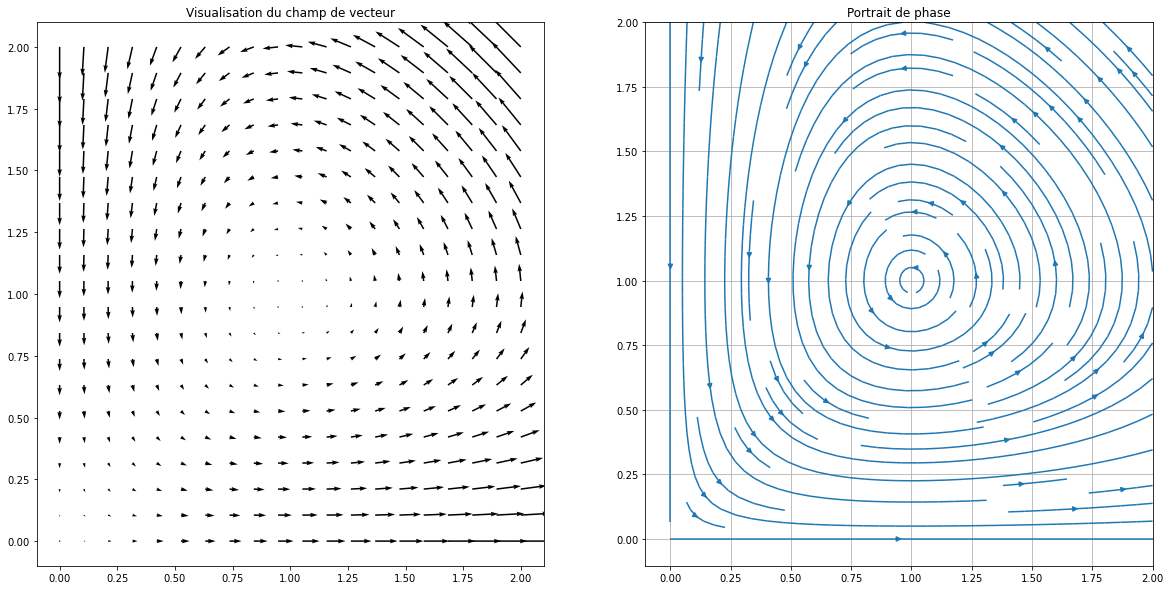

In [2]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))

plt.grid()
a = 1
b = 1
c = 1
d = 1

x_1 = np.linspace(0, 2, 20)
x_2 = np.linspace(0, 2, 20)
X,Y = np.meshgrid(x_1, x_2)
U =  X*(a-b*Y)
V = -Y*(c-d*X)
ax1.quiver(X,Y,U,V)
ax1.set_title('Visualisation du champ de vecteur')
ax2.streamplot(X,Y,U,V)
ax2.set_title('Portrait de phase');

Au vue de ces graphiques, on peut intuiter que les solutions vont converger vers le point d'équilibre $\bar x$ et non vers $x_0$.

## Question 3 :

On a déjà l'existence de solutions maximales. De plus on a que $\dot X = f(X)$ avec $f$ une fonction $C^1$  donc nottament continûment différentiable par rapport à la première variable, donc d'après les théorème de Cauchy-Lipschitz : on a unicité de la solution maximale.

On cherche maintenant à savoir si on peut avoir une solution initialisée dans $\mathbb{R}_{>0} *\mathbb{R}_{>0}$ croise l'axe des abscisses ou des ordonnées. 

Si $\exists t \in\mathbb{R}, \ x_1(t)=0$ alors d'après le système $\dot x_1=0$ donc il existe une solutionqui colle à l'axe des abscisses. De même pour $x_2$ si une solution croise l'axe des ordonnées alors celle-ci y restera. 

Ainsi en initialisant $x_1(t=0) >0 \text{ et } x_2(t=0) >0$ nécessairement $\forall t\in\mathbb{R}, x_1 >0  \text{ et } x_2 >0$. En effet sinon on se ramène au cas précedent et par unicité on a une absurdité. Le théorème de Cauchy-Lipschitz permet d'affirmer que deux solutions ne peuvent se croiser, cela est du à l'unicité.


## Question 5:

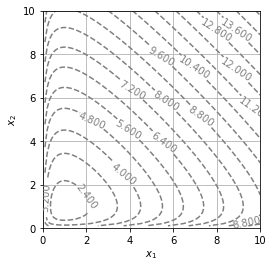

In [3]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
#from math import ln
def f1(x,y):
    return d*x-c*np.log(x)+b*y-a*np.log(y)
display_contour(
f1, 
x = np.linspace(0, 10.0, 100), 
y = np.linspace(0, 10.0, 100), 
levels = 20 # 20 levels, automatically selected
)

On peut ainsi placer $\bar x$ dans le 'trou' formé par les lignes de niveau.

Ainsi cette courbe caractérise l'évolution de $x_1 \text{ et } x_2$, c'est à dire que on peut associer les courbes de niveau aux trajectoires des solutions. On remarque ici que ces trajectoires sont fermées donc les solutions vont être periodiques.

On dit que le point d'équilibre $\bar x$ est stable si les solutions restent arbitrairement proches de $\bar x$ quand elles sont initialisées suffisament proche de $\bar x$.
Ici on voit graphiquement que $\bar x$ se trouve au 'fond du trou' formé par les courbes de niveau, donc on en déduit que $\forall \epsilon>0$ on peut trouver une courbe de niveau dans le cercle de rayon $\epsilon$ de centre $\bar x$ donc il suffit d'initialiser la solution sur un point de cette courbe de niveau pour avoir une solution qui reste proche (à $\epsilon$ près) de $\bar x$.

## Question 6 :


In [4]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    dim_sol=len(x0)
    nb_time = int((tf-t0)/dt)
    time = np.linspace(t0, tf, nb_time)
    x = np.zeros(shape=(nb_time, dim_sol))
    x[0] = x0
    for i in range(len(time)-1):
        x[i+1] = x[i] + dt*f(x[i], time[i])
    return time, x

On teste cette fonction sur une équation différentielle dont on connaît la solution analytique: on cherche à résoudre $ \left\{ \begin{array}{ll}
        \dot x_1 = -2x_1 \\
        \dot x_2 = -3x_2 \\
    \end{array}
    \right.$. Les solutions de cette équation sont de la forme $\left\{ \begin{array}{ll}
        x_1(t) = \lambda e^{-2t} \\
        x_2(t) = \mu e^{-3t} \\
    \end{array}
    \right.$ avec la condition initiale $x_0 = \begin{pmatrix}
  \lambda \\
  \mu \\
 \end{pmatrix}
        $. On prend $\lambda = \mu = 1$ pour la resolution numérique.

In [5]:
def f(x,t):
    return np.array([-2*x[0], -3*x[1]])

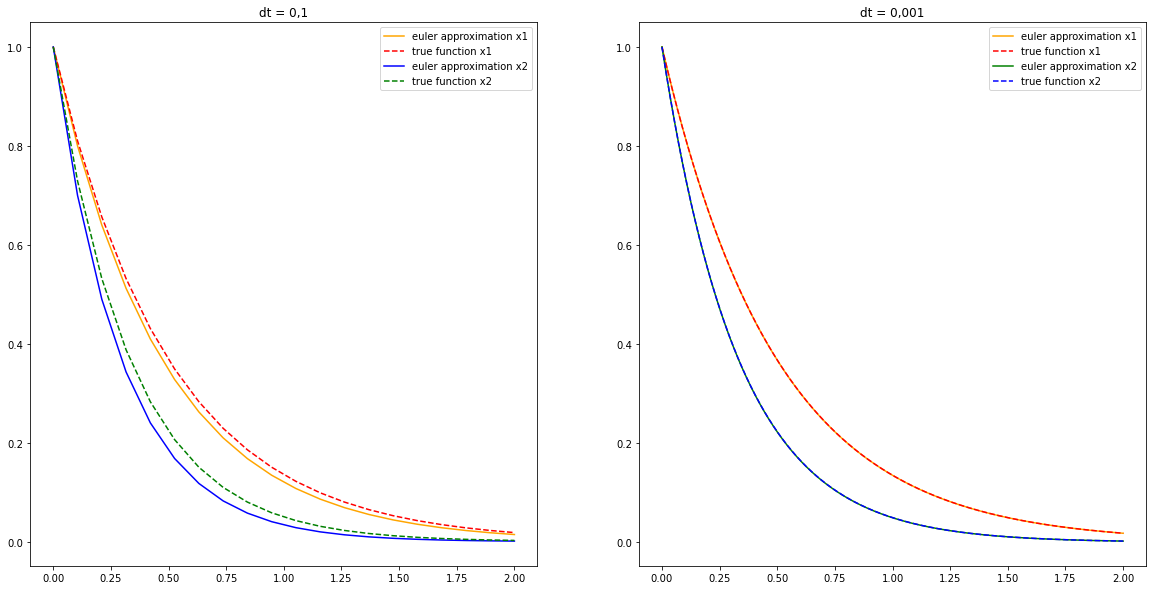

In [6]:
x0 = np.array([1, 1])
dt = 0.1
t0 = 0
tf = 2
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (20,10))
#x = [x1, x2]
time, x = solve_euler_explicit(f, x0, dt, t0, tf)
x = x.transpose()
ax1.plot(time,x[0],'orange', label = 'euler approximation x1')
ax1.plot(time,np.exp(-2*time),'r--', label = 'true function x1')
ax1.plot(time,x[1],'blue', label = 'euler approximation x2')
ax1.plot(time,np.exp(-3*time),'g--', label = 'true function x2')

ax1.set_title('dt = 0,1')
ax1.legend()
dt = 0.001
time1, x1 = solve_euler_explicit(f, x0, dt, t0, tf)
x1 = x1.transpose()
ax2.plot(time1,x1[0],'orange', label = 'euler approximation x1')
ax2.plot(time1,np.exp(-2*time1),'r--', label = 'true function x1')
ax2.plot(time1,x1[1],'green', label = 'euler approximation x2')
ax2.plot(time1,np.exp(-3*time1),'b--', label = 'true function x2')
ax2.set_title('dt = 0,001')
ax2.legend()
plt.show()

Les deux fonctions sont bien superposées, le programme Euler fonctionne. 

On s'interesse à la convergence du schéma d'Euler :
* on montre que le schéma d'Euler explicite est consistant d'ordre 1: 
on a $x_{j+1}=x_j+dt*\phi(t_j,x_j,dt)$ soit $x_{j+1}=x_j-2x_jdt$ donc $\phi(t,x,dt)=-2x$ dans notre cas un pas de temps constant. 
Avec $\forall (t,x) \in \mathbb{R}*\mathbb{R}^n, \ \phi(t,x,0) = f(t,x)$.Donc le schéma est explicite ici.
* de plus $f(x,t)=-2x \in C^1$ par rapport à $x$ 

On a alors une condition suffisante pour affirmer qu'il existe un pas de temps max $\Delta t_{max}>0$ tel que le schéma est convergent.

Visualisation graphique de l'ordre de convergence :

On calcule l'erreur globale, soit le maximum de l'erreur locale pour différentes valeurs du pas de temps :


(20,)


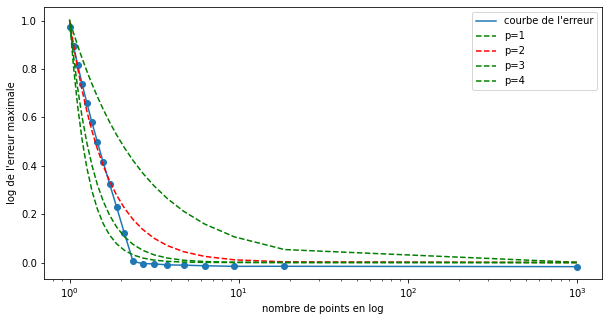

In [100]:
DT = np.linspace(0.001,1,20)
N = np.zeros(20)
ER =[]
for i,dt in enumerate(DT) :
    n = (1-0.001)/dt
    time, x = solve_euler_explicit(f, x0, dt, t0, tf)
    true = np.exp(-2*x[:,0])
    error = np.max(np.abs( x[:,1]-true))
    N[i] = n
    ER.append(error)
   
plt.figure(figsize=(10,5))
print(np.shape(ER))
plt.scatter(N,np.log10(ER))
plt.plot(N,np.log10(ER), label = "courbe de l'erreur")
plt.xlabel('nombre de points en log')
plt.ylabel("log de l'erreur maximale")
#plt.yscale('log')
plt.xscale('log')
plt.plot(N,N**(-1),'g--', label = 'p=1')
plt.plot(N,N**(-2),'r--', label = 'p=2')
plt.plot(N,N**(-3),'g--', label = 'p=3')
plt.plot(N,N**(-4),'g--', label = 'p=4')
plt.legend()



## Question 7 :

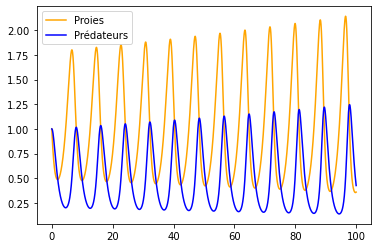

In [115]:
def Lotka_Volterra(x,t):
    alpha = 2/3
    beta = 4/3
    delta = 1
    gamma = 1
    x1, x2 = x[0], x[1]
    return np.array([x1*(alpha-beta*x2), -x2*(gamma-delta*x1)])

x0 = np.array([1.0, 1.0])
dt = 0.01
t0 = 0
tf = 100
time, x = solve_euler_explicit(Lotka_Volterra, x0, dt, t0, tf)
x = x.transpose()
plt.plot(time,x[0],'orange', label = 'Proies')
plt.plot(time,x[1],'blue', label = 'Prédateurs')
plt.legend()
plt.show()


## Question 8 :


In [108]:
def point_fixe(F, x0, eps, itermax):
    i = 0
    xj = x0
    xj1 = F(x0)
    d = xj1-xj
    while np.sqrt(d[0]**2+d[1]**2) > eps and i < itermax:
        xj, xj1 = xj1, F(xj1)
        d = xj1-xj
        i += 1
    return xj1

In [109]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    dim_sol=len(x0)
    nb_time = int((tf-t0)/dt)
    time = np.linspace(t0, tf, nb_time)
    x = np.zeros(shape=(nb_time, dim_sol))
    x[0] = x0
    for i in range(len(time)-1):
        def Fi(u):
            return x[i]+f(u,time[i])*dt
        x[i+1] = point_fixe(Fi, x[i], dt/10, itermax)
    return time, x



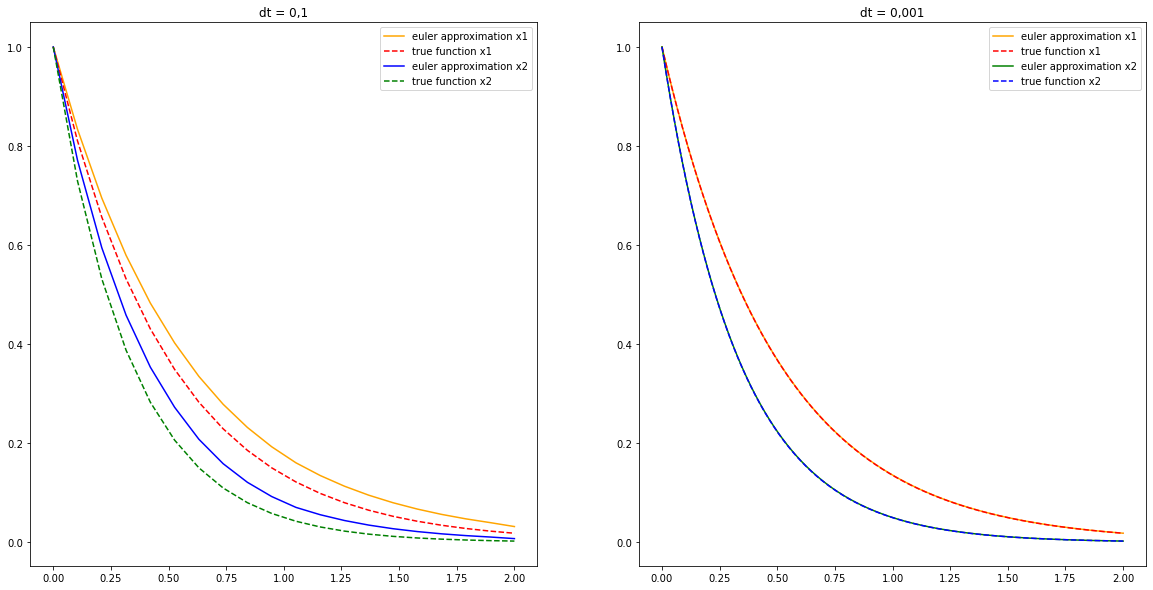

In [110]:
""" test de la fonction solve_euler_implicit sur un exemple dont la solution exacte est connue """

x0 = np.array([1, 1])
dt = 0.1
t0 = 0
tf = 2
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (20,10))
#x = [x1, x2]
time, x = solve_euler_implicit(f, x0, dt, t0, tf)
x = x.transpose()
ax1.plot(time,x[0],'orange', label = 'euler approximation x1')
ax1.plot(time,np.exp(-2*time),'r--', label = 'true function x1')
ax1.plot(time,x[1],'blue', label = 'euler approximation x2')
ax1.plot(time,np.exp(-3*time),'g--', label = 'true function x2')

ax1.set_title('dt = 0,1')
ax1.legend()
dt = 0.001
time1, x1 = solve_euler_implicit(f, x0, dt, t0, tf)
x1 = x1.transpose()
ax2.plot(time1,x1[0],'orange', label = 'euler approximation x1')
ax2.plot(time1,np.exp(-2*time1),'r--', label = 'true function x1')
ax2.plot(time1,x1[1],'green', label = 'euler approximation x2')
ax2.plot(time1,np.exp(-3*time1),'b--', label = 'true function x2')
ax2.set_title('dt = 0,001')
ax2.legend()
plt.show()

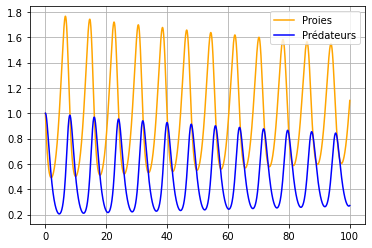

In [116]:
x0 = np.array([1.0, 1.0])
dt = 0.01
t0 = 0
tf = 100
time, x = solve_euler_implicit(Lotka_Volterra, x0, dt, t0, tf)
x = x.transpose()
plt.plot(time,x[0],'orange', label = 'Proies')
plt.plot(time,x[1],'blue', label = 'Prédateurs')
plt.grid()
plt.legend()
plt.show()

## Question 10 :

Soit $H_O \in\mathbb{R}$, on note $h(x)= H(x(t))-H_0$ puis on calcul


$$
\begin{align} 
\frac{d }{dt} (H-H_0)&= \frac{dH}{dt} 
 \\ &= \delta \dot x_1- \frac{\gamma}{x_1} \dot x_1 + \beta \dot x_2 -  \frac{\alpha}{x_2} \dot x_2
 \\ &= (\delta - \frac{\gamma}{x_1})*(x_1(\alpha - \beta x_2)-u_1 h(x)) + (\beta - \frac{\alpha}{x_2})*(-x_2(\gamma-\delta x_1) - u_2 h(x))
 
  \end{align}
$$


Or en calculant le gradient on a :
$$
 \begin{align}
\nabla H(x,t) &=  \begin{pmatrix}
  \delta - \frac{\gamma}{x_1} \\
  \beta  -  \frac{\alpha}{x_2}  \\
 \end{pmatrix}
 \\
 
 \\   ||\nabla H(x,t)||^2 &= (\delta - \frac{\gamma}{x_1})^2 + (\beta  -  \frac{\alpha}{x_2})^2
 \\ & \text{on note}  \left\{ \begin{array}{ll}
        A=\delta- \frac{\gamma}{x_1}$ \\
        B=\beta - \frac{\alpha}{x_2} \\
    \end{array}
    \right.
\\   ||\nabla H(x,t)||^2 &= A²+B²
 \end{align}
$$

On remarque alors en retournant à notre calcul de derivé :
$$
\begin{align} 
\frac{d }{dt} (H-H_0) &= A*(x_1(\alpha - \beta x_2)-u_1 h(x)) + B*(-x_2(\gamma-\delta x_1) - u_2 h(x))
\\ &= -k ||\nabla H(x,t)||^2*h(x)
\end{align} 
$$

Soit pour avoir cette égalité :
$$
 \left\{ \begin{array}{ll}
        -kAh(x) = \alpha x_1 - \beta x_1 x_2 - u_1 h(x) \\
        -kBh(x) = \gamma x_2 - \delta x_1 x_2 - u_2 h(x)  \\
    \end{array}
    \right.
\\ \iff
\left\{ \begin{array}{ll}
        u_1 = \frac{\alpha x_1 - \beta x_1 x_2}{h(x)} + kA \\
        u_2 = \frac{-\gamma x_1 - \beta x_1 x_2}{h(x)} + kB  \\
    \end{array}
    \right.
$$
En effet $h(x) = H(x(t)) - H_0 \neq0$. 
Si $h(x) = 0$ on a automatiquement l'égalite.

DOnc on peut bien choisir $u$ telle que l'égalité soit satisfaite avec $u$ continûment différentielle

Soit x qui reste à une distance strictement positive de $\bar x$ :

On majore le gradient pour pouvoir intégrer notre égalité :
$$
\nabla H(x,t) =  \begin{pmatrix}
  \delta - \frac{\gamma}{x_1} \\
  \beta  -  \frac{\alpha}{x_2}  \\
 \end{pmatrix}
 < \begin{pmatrix}
  \delta  \\
  \beta   \\
 \end{pmatrix}
 = J
 \\ \text {car $x_1>0$ et $x_2>0$ et $\gamma >0$ et  $\alpha>0$}
\\ \frac{d }{dt} (h(x)) < -k * J * h(x)
$$
Donc dans le cas de l'égalite : $\frac{d }{dt} (h(x)) = -k * J * h(x)$ on peut intégrer pour avoir $h(x) = h_0 \exp(-kJ*t)$. Dans le cas d'inégalité on obtient  $h(x) < h_0 \exp(-kJ*t)$ c'est à dire que H(x(t)) va converger exponentiellement vers $H_0$ quand $t$ tend vers $+\infty$.